In [17]:
from iminuit import Minuit
from iminuit.cost import ExtendedBinnedNLL
import numpy as np
import numba as nb
from matplotlib import pyplot as plt
from progressbar import progressbar
from pyik.mplext import plot_hist
from IPython.display import display
from scipy.stats import norm
from math import erf

In [2]:
@nb.njit
def norm_cdf(x, mu, sigma):
    z = (x - mu) / (sigma * np.sqrt(2))
    r = np.empty_like(x)
    for i in range(len(x)):
        r[i] = 0.5 * (1.0 + erf(z[i]))
    return r


def model(x, sig, bkg):
    return sig * norm_cdf(x, 0.5, 0.1) + bkg * x


bkg = 200
xe = np.linspace(0, 1, 21)
n = np.diff(model(xe, 20, bkg))

nll = ExtendedBinnedNLL(n, xe, model)

m1 = Minuit(nll, 1, 1)
m1.limits = (0, None)
display(m1.migrad())
m2 = Minuit(nll, 1, 1)
m2.limits[1] = (0, None)
display(m2.migrad())
m3 = Minuit(nll, 0, 1)
m3.fixed[0] = True
m3.limits = (0, None)
display(m3.migrad())
exp1 = m3.fval - m1.fval, m1.values[0], m1.errors[0]
exp2 = m3.fval - m2.fval, m2.values[0], m2.errors[0]

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 3.861e-06                  │              Nfcn = 91               │
│ EDM = 3.86e-06 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ sig  │    20     │    12     │            │            │    0    │         │       │
│ 1 │ bkg  │    200    │    18     │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────────┐
│     │  sig  bkg │
├─────┼───────────┤
│ sig │  138 -118 │
│ bkg │ -118  318 │
└─────┴───────────┘

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 2.091e-06                  │              Nfcn = 99               │
│ EDM = 2.09e-06 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ sig  │    20     │    12     │            │            │         │         │       │
│ 1 │ bkg  │    200    │    18     │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────────┐
│     │  sig  bkg │
├─────┼───────────┤
│ sig │  138 -118 │
│ bkg │ -118  318 │
└─────┴───────────┘

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 3.132                      │              Nfcn = 42               │
│ EDM = 2.31e-05 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ sig  │    0.0    │    0.1    │            │            │    0    │         │  yes  │
│ 1 │ bkg  │    220    │    15     │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────┐
│     │ sig bkg │
├─────┼─────────┤
│ sig │   0   0 │
│ bkg │   0 220 │
└─────┴─────────┘

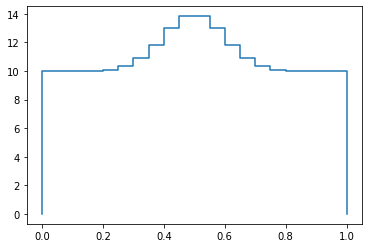

In [3]:
plot_hist(xe, n)

In [4]:
print(f"with limit   : dQ = {exp1[0]:.3g}     "
      f"significance of signal amplitude = {exp1[1] / exp1[2]:.1f}σ")
print(f"without limit: dQ = {exp2[0]:.3g}     "
      f"significance of signal amplitude = {exp2[1] / exp2[2]:.1f}σ")

with limit   : dQ = 3.13     significance of signal amplitude = 1.7σ
without limit: dQ = 3.13     significance of signal amplitude = 1.7σ


In [9]:
rng = np.random.default_rng(1)
vbkg = np.diff(model(xe, 0, bkg))
r1 = []
r2 = []
for itoy in progressbar(range(50000)):
    nll.n = rng.poisson(vbkg)
    m1 = Minuit(nll, 0, bkg)
    m1.limits = (0, None)
    m1.migrad()
    m2 = Minuit(nll, 0, bkg)
    m2.limits[1] = (0, None)
    m2.migrad()
    m3 = Minuit(nll, 0, bkg)
    m3.fixed[0] = True
    m3.limits = (0, None)
    m3.migrad()
    if m3.valid:
        if m2.valid:
            r1.append((m3.fval - m1.fval, m1.values[0]))
        if m2.valid:
            r2.append((m3.fval - m2.fval, m2.values[0]))
r1 = np.array(r1)
r2 = np.array(r2)

100% (50000 of 50000) |##################| Elapsed Time: 0:01:39 Time:  0:01:39


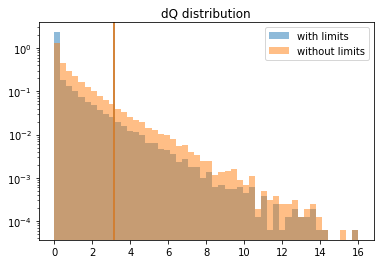

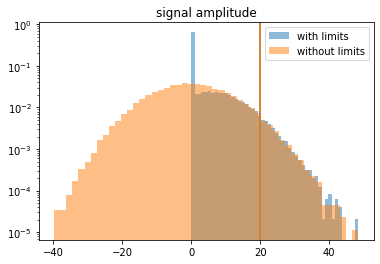

In [14]:
plt.figure()
plt.title("dQ distribution")
plt.hist(r1[:,0], bins=50, alpha=0.5, density=True, label="with limits")
plt.hist(r2[:,0], bins=50, alpha=0.5, density=True, label="without limits")
plt.legend()
plt.axvline(exp1[0], color="C0")
plt.axvline(exp2[0], color="C1")
plt.semilogy()

plt.figure()
plt.title("signal amplitude")
plt.hist(r1[:,1], bins=50, alpha=0.5, density=True, label="with limits")
plt.hist(r2[:,1], bins=50, alpha=0.5, density=True, label="without limits")
plt.legend()
plt.axvline(exp1[1], color="C0")
plt.axvline(exp2[1], color="C1")
plt.semilogy();

In [18]:
def pvalue2sigma(p):
    return norm.ppf(1 - p)

In [21]:
p1 = np.sum(r1[:,1] > exp1[1])/len(r1)
p2 = np.sum(r2[:,1] > exp2[1])/len(r2)
print(f"p-value based on amplitude with limit    {p1:.3f}    significance = {pvalue2sigma(p1):.1f}σ")
print(f"p-value based on amplitude without limit {p2:.3f}    significance = {pvalue2sigma(p2):.1f}σ")

p-value based on amplitude with limit    0.031    significance = 1.9σ
p-value based on amplitude without limit 0.031    significance = 1.9σ


In [22]:
p1 = np.sum(r1[:,0] > exp1[0])/len(r1)
p2 = np.sum(r2[:,0] > exp1[0])/len(r2)
print(f"p-value based on dQ with limit    {p1:.3f}    significance = {pvalue2sigma(p1):.1f}σ")
print(f"p-value based on dQ without limit {p2:.3f}    significance = {pvalue2sigma(p2):.1f}σ")

p-value based on dQ with limit    0.037    significance = 1.8σ
p-value based on dQ without limit 0.077    significance = 1.4σ


The p-value computed from the fitted amplitude should agree with the p-value computed from dQ. This is only the case if the fit imposes a limit on the signal amplitude.